<a href="https://colab.research.google.com/github/aleshkovskijjaaa/--PY1/blob/main/Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from google.colab import files
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers import Dense,Dropout,Input,MaxPooling2D,MaxPool2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD

In [3]:
from google.colab import files


files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aleshkovskijj","key":"7863736cf442152b2ced70a7f2e1dffe"}'}

In [4]:
# Создаем директорию kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [5]:
# права доступа к файлу
!chmod 600 ~/.kaggle/kaggle.json


In [6]:

!pip install kaggle


In [7]:
!kaggle datasets download -d volkandl/car-brand-logos


 97% 210M/217M [00:01<00:00, 124MB/s]
100% 217M/217M [00:01<00:00, 122MB/s]


In [8]:

!unzip 'car-brand-logos.zip' -d car-brand-logos

Archive:  car-brand-logos.zip
  inflating: car-brand-logos/Car_Brand_Logos/README.txt  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/-car-hyundai-i30-hyundai-tucs-car-logo-5ad2754300c7e0.8761883915237420190032.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/123123.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/123qqq.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/12r12r.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/23.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/2313.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/2r2r.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/HYUNDAI-BEYINCI-1.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/Hyundai-Logo-720x340.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/Hyundai-Logo-Arma-Patch-ORJ-003.jpg  
  inflating: car-brand-logos/Car_Brand_Logos/Test/hyundai/Hyundai-Logo.jpg  
  inflating: 

In [9]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator()


train_generator = datagen.flow_from_directory(
    "/content/car-brand-logos/Car_Brand_Logos/Train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)


test_generator = datagen.flow_from_directory(
    "/content/car-brand-logos/Car_Brand_Logos/Test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

Found 2513 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [10]:
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( IMAGE_SIZE,IMAGE_SIZE, 3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('softmax'))
model.summary()

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 331, 331, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 331, 331, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 165, 165, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 165, 165, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 165, 165, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 82, 82, 128)       0         
                                                         

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 331, 331, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 331, 331, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 165, 165, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 165, 165, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 165, 165, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 82, 82, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 82, 82, 256)       2

In [11]:
epochs = 5

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

Epoch 1/5
40/40 [==============================] - ETA: 0s - loss: 41.2933 - accuracy: 0.4986  

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 4521s 113s/step - loss: 41.2933 - accuracy: 0.4986 - val_loss: 5.3681 - val_accuracy: 0.7225
Epoch 2/5
40/40 [==============================] - 4588s 115s/step - loss: 2.7627 - accuracy: 0.8122 - val_loss: 3.0982 - val_accuracy: 0.7725
Epoch 3/5
40/40 [==============================] - 4642s 116s/step - loss: 1.4789 - accuracy: 0.8814 - val_loss: 2.9644 - val_accuracy: 0.7675
Epoch 4/5
40/40 [==============================] - 4622s 116s/step - loss: 1.2273 - accuracy: 0.9089 - val_loss: 2.9726 - val_accuracy: 0.7700
Epoch 5/5
40/40 [==============================] - 4506s 113s/step - loss: 1.2782 - accuracy: 0.9212 - val_loss: 3.2531 - val_accuracy: 0.7875


<ipython-input-12-dcc572878ae4>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


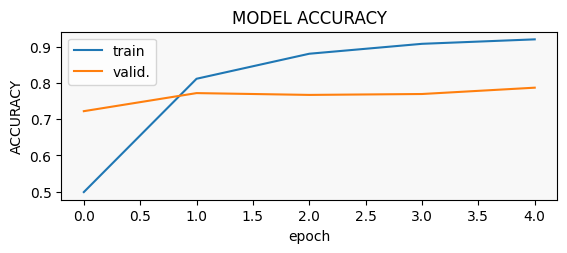

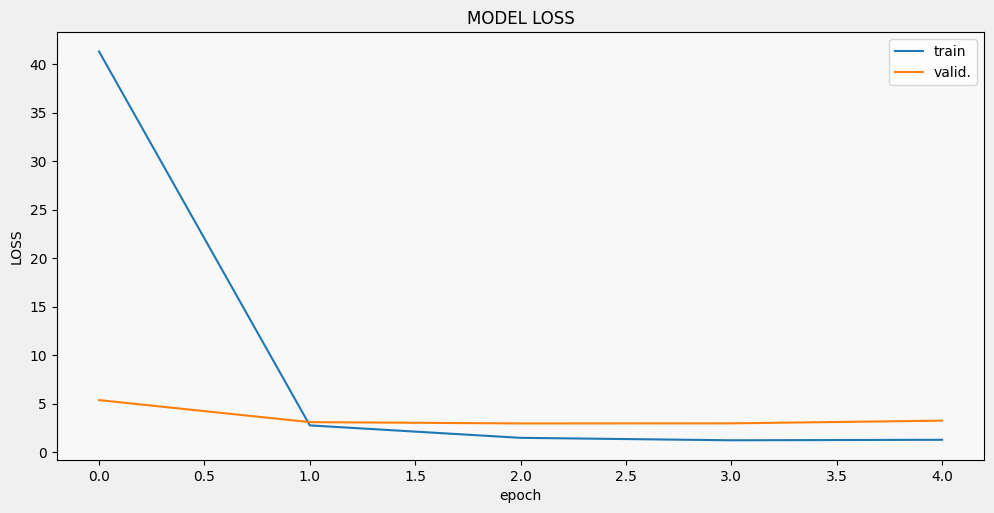

In [12]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1:
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)


display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)


In [13]:
score = model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

7/7 [==============================] - 675s 93s/step - loss: 3.2531 - accuracy: 0.7875
Accuracy: 78.75%
Loss:  3.253060817718506


In [15]:
class_names=train_generator.class_indices

labels={}
for key, value in class_names.items():
    labels[value]=key

In [16]:

labels

{0: 'hyundai',
 1: 'lexus',
 2: 'mazda',
 3: 'mercedes',
 4: 'opel',
 5: 'skoda',
 6: 'toyota',
 7: 'volkswagen'}

In [22]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.IMREAD_UNCHANGED)

  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE),3)
  result = np.expand_dims(resized, axis=0)
  result= model.predict(result)
  print(labels[np.argmax(result)])
  cv2_imshow(resized)

In [18]:
import urllib.request
#hyundai
urllib.request.urlretrieve("https://images.unsplash.com/photo-1588036873025-7261a5647adf?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2220&q=80", "hyundai-1.jpg")
urllib.request.urlretrieve("https://images.unsplash.com/photo-1471977360223-d8cc63cec57c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80", "hyundai-2.jpg")

#lexus
urllib.request.urlretrieve("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAAeFBMVEX///8AAAD29vaysrJ6enpHR0fGxsZ0dHQpKSn5+fmmpqZjY2NtbW3W1tbo6OhLS0uMjIw3Nzfw8PBfX1+dnZ28vLzi4uKSkpLPz8+srKy2trZQUFAiIiLk5OTc3NwTExOEhISPj48ZGRk+Pj4xMTFYWFgLCwsdHR0qW3nfAAAJyUlEQVR4nO2d22LiIBCG10NTE020qfFUtbGt9v3fcGs0BJjhnBqxfFe7FhV+YRhmgPz7FwgEAoFAIBAIBAKBQCAQCAQCN6Cf7dNVdCZNs7zr2twpi2I+fP3qAbZvw3mxj7uu3t2QJs8jqBLLabyM/nw/WyRHlU4Nn4uuq9sh6eykr1RFv+sqd0Q+f0dG23G4HESrfZbna0ys6OeNvemm67rfmHTM6/BUbvZMkRdErJ+XqzeWf8h+RZ+sBi/LFSizwDvW5vrPyR+xXykr1dMA7SaIVsufl4fkf5M/0Lv6E0aAuaDJU6jVsfpDXpIXZjesdicwdvulEBU7QK3e67/ljb2LblPpbug/0VKJmxohgzBr/pwSJ3Zyg0p3xIpuvLBX/WiKaMUqm5DXH9XQL6m2H2QFEa+Bt085mSUGv1jj7qBcq9FOVrCEWk1hKSJ9+TvV7RTKXJXSgpjBwsqRQf14hotyriTW6occ0Qo3TPnH9c9vv1HhDvlUtZyAGCyhWarLvrZd3U55JQ0/KRzvGdTqWVx6qi7iHY0CJ0WUZQW1+pKVr/vWvM3qdkrRtFyhFeZhSbtiXAd64FLcTyiTnSmKPkGtFEuarC73IHH6RgHVz7+EWkm91zN1t32MKbFZmqgMyx5q9aT+/DqM8QiufGOGEDecBTFYOoOrLttCZbvmmTRclW54hVqlOt8wuBYunevaNcQA99aKkkiKQtMh2F6Lq6aPu4cERkeKghnUStdm1zbed9e0cRtUUU0kK639LboD/c451O14URQcQq20DFbF/PqOpVtlu0a3YyFxGYOWkyHsVtmOIRqc5OViqJWqKzLU+2+8XvSQwaWY15DMl1FasHb9hy6V7RrSdPmsPodamfnjJFjhUtmOITl4aZgFS9UfDb+pfp/HyR7iZ8qN9QcUyzSGUDseKs/3jiEmS2p4Ea9BHqZHqH1fj40WibzLvEXEazCPqR+u7/y0r2zXkNZLyiBeg0Ugb63xTfcN0UG2yEM2lVps7SORa28DpsSxlqxwkViDMu6FQHwHbyMPJPJZCotgKVWbXWpErL267H2S1i0Q++9vUCurrBYRS3/1fWcQsYR79Aqo1bfVV/kv1k45DJGN8HZrYSKWdH/OPUMM0lhQIIFaiYoqIF3U3225dQtECS2olW2wkyzFrevaOT15EzZQK9s9C/Vyx87i3QVkrsP7C0zWK2KEYhxH8T1ANjyiQWXExzJeQF8hQR6Pd9MQs4uGaKDf8I4V04FskvA4rkzWO6iFh9tArHeHkk+wr2v3ED8KM1owjmVrcUgfNQ2w3hXEaGGBhAkQy7Zj1Pl7nwOllGONjUNELLtx2Pi23gZoKkgzkNDJAYrV630+GdPk0Tx2HM7IzkEgq2hHPJ4LzzRb2RAT37ZWRknse4TsZSvh35AtpE54f/ywcdMRq6W8/MII7zsW5U0hofV4K2u8Kd5GlBuaVBfmBBlcGKLC931/FQPSHCzzUrTWuW7esF+B+EFb9M8rJH1vgbfxZJbGfRCl5bNovSyHDpSJ3747RXPUy+N9Gzej2axWdl0VDxj+St+K51eSFj/0Dhgr7ZY55Iy0vxscBDTxmK+WUnvNTmh/c4UiKAfBNi2Bf97oYSZCCmpL8ti5fc12wcc6eU+gD4u7meSsWSV5nPuS06dud/i2H4tZc4TR300zGtCnAz7szunS1wU+xNpZTM7sXpuZLuj6CRUC2z5yt7oQMWGGr7m+j5SvmSM+Xqe9tNmwN5S+l4XaUcqjkg2rPpjTLqHg7t7snSbzSDQkF8WczzB+/I1eVbNHg1hP43KZrIsL62Q5HPOqnhl7n5gwp0Ay0mqm60d02HWIym8jpSYbz4+MO5IXJTbUAB+T9QNkb9pgV8yfp6L7zr9eZ4P0r449Mfl+VWySZHkhSTZRugsqBQKBQCAQCAQCgcANiI6vhKP9PXDZqhgMEgt0PjyZYSjDpdGAAt0j30+ZMkLqy5MG9ArfLre0mmlFWXBOyshLLvh0ZS6aiS7CpkVD5HFlOPXvwpy9tRBr57zLUZFURg4HX1AePnmmS/N7nZALzsTU/d9NrAy5ttaYqSQOE4u/wEUs9CF3Yurf00ks4zMSnyn6sjAFwZzvGe2ZU9X2YokGtpAWxIrNTdXXvxi5UUW0fTJjxBlwD7iwFgv/wWS4i4Vc8KvkfPkfcvUFvsXtQBeormhpRSyL02jOYiG3t6upbkrcoQcF+MOuzI1tx4uWbYgFHpPxOlExrutmKxbQamhwkyM6gzLHWPuMYa9tWgticePh3Wjrk6VY4FIGs0QV9tgm2uViJvamVi2IxfpWhifQLcXi/TnTTbC4nb/ahpQepyfK93YXi30QmeklcHZi8Q+gtdhcjdr5s8sVM40s6fc4i8UNQtNEm5VY/IRitbMTt/MrpkJbySOAbcRif2TjfUtWYvEtNP3SK8qVEr+wdxXLsWNZiQXWVYXW2h1OPKidJ7yALVuuYrErDo3n1HDYiCVtoqTx8JP6qJ2/gIxtV7HYaWk0VlNu6KnLQix5fxCD/pKonT8XxuZXR7F2PRuOzUZfC7GQ54BqgXf7HbpHCw9DOooljPYoIO6yhVi2oT6RjUDtPOpZO4qFPDxRj21sLVZ+ITYdjkKDGmEhS6wujmLx3qE+39Zi/UPeqYNYLNTjGkFP11Es5ImAukzcxDKKy1YIHs7QF17uAG7dchRLMvUqSYFYBvdXwVnsrchjOZof1MD/eI5ixUURrQDRKt0DCv5BulV6hMnu6F/UDx+eancf0+ILfBDNlnUgmBYoIwbShIWSZ7Ym1SqFtdK6W6fBw1M/7DZds14IZueZWZER60P14W5i8YGVc2dgn+OifKrnFWBmrLRif6hRis7t9FBkv1b1nY5iHZBfjX1JL4YHnAaLJynwhr0KAWC5hG0zK07gOyQ4isWlrqomcv64llq8obG5jZU17OO6m2C+EPkpuPorupajWNwzuarQNh8g1tjvAKy7+R6JPaP3N3XOEnPf6lmai6ON5PFZN7H4elz6NzAUz5tVKmMPssSzyBC2O7PxhZyftXvEQQXPnTnIsiTMMspQrD6fP67vyJbP3r/OGPQPLNF9GYpIMv9lKuCNWRe8j0yAi3vyg7Z7954Z75h/htn5alZEnsF2IxqPGnm+4I0QRe+Rw4jVrGi+yGoH2t3rqA5vYguNJdnPQ9E6zOIE+3yXfjuXyZkhvdkB2+pyHoq2cVoXgEcXr288GD9ViVnEzldDcXPjik7Rs+5xNJ847Hg0QyPXuEceE1n1xn4xO2rvcXTjbSm/qSPu34AWTl32swVwAfeLXaYgV9UsHAgNBAKBQCAQCAQCgUAgEAgE/hj/AdyQhnaNg4ZaAAAAAElFTkSuQmCC", "lexus-1.jpg")
urllib.request.urlretrieve("https://thumbs.dreamstime.com/z/new-hope-minnesota-october-close-up-lexus-logo-emblem-car-257994350.jpg", "lexus-2.jpg")

#mazda
urllib.request.urlretrieve("https://www.shutterstock.com/image-photo/bangkokthailand-may-222014-logo-brand-260nw-204080434.jpg","mazda-1.jpg")
urllib.request.urlretrieve("https://www.schoolphotoproject.com/_picture-of-cars-motorbikes/car-mazda-logo-photo-l.jpg","mazda-2.jpg")


#mercedes
urllib.request.urlretrieve("https://images.newindianexpress.com/uploads/user/imagelibrary/2021/12/2/w900X450/Mercedes_Benz_AP.jpg?w=400&dpr=2.6","mercedes-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ854tdVSiZLeBxVSjW-zdtGnHAA67yu2N06w&usqp=CAU","mercedes-2.jpg")

#opel
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQESUxbt7oUoBmKslA5YNh3b0NcXUojMM3Aeg&usqp=CAU","opel-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgyyB9T1otFMlgiMojMr3GE03fFoEsU6reQA&usqp=CAU","opel-2.jpg")


#skoda
urllib.request.urlretrieve("https://thumbs.dreamstime.com/b/bordeaux-aquitaine-france-skoda-logo-brand-car-dealership-text-sign-vehicle-store-showroom-shop-czech-bordeaux-aquitaine-france-219259318.jpg","skoda-1.jpg")
urllib.request.urlretrieve("https://media.gettyimages.com/id/1230550013/photo/a-skoda-logo-seen-on-a-parked-car-in-dublin-city-center-on-tuesday-january-11-in-dublin.jpg?s=612x612&w=gi&k=20&c=b8xHL2cUjvyQC1jGIVLqgglYVZGB7RGWqd5QV2VD5cw=","skoda-2.jpg")


#toyota
urllib.request.urlretrieve("https://us.123rf.com/450wm/engdao/engdao1904/engdao190400491/engdao190400491.jpg?ver=6","toyota-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLednVkQl--Dx9jOqUFk1t5EXfTkzyiiWPOw&usqp=CAU","toyota-2.jpg")

#volkswagen
urllib.request.urlretrieve("https://www.thedrive.com/content/2020/04/vw-logo-atlas.jpg?quality=85&crop=16%3A9&auto=webp&optimize=high&quality=70&width=1440","volkswagen-1.jpg")
urllib.request.urlretrieve("https://m.media-amazon.com/images/I/51SsqpaeYOL.jpg","volkswagen-2.jpg")

('volkswagen-2.jpg', <http.client.HTTPMessage at 0x7ba5c6434520>)

Original Dimensions :  (1591, 2220, 3)
1/1 [==============================] - 2s 2s/step
mazda


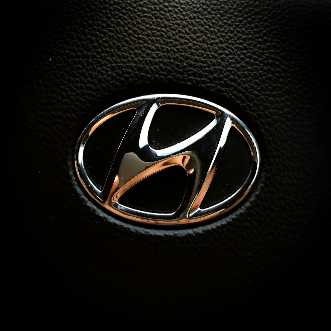

Original Dimensions :  (1560, 2340, 3)
1/1 [==============================] - 2s 2s/step
mazda


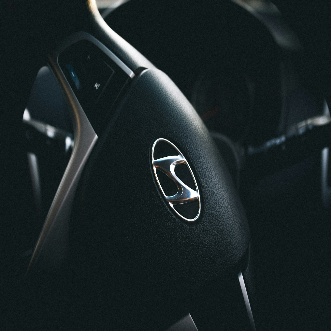

Original Dimensions :  (168, 300, 3)
1/1 [==============================] - 1s 1s/step
lexus


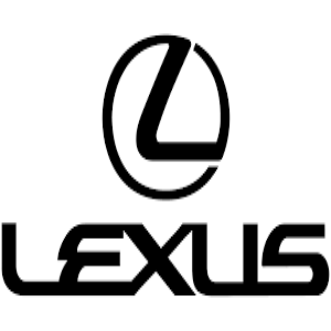

Original Dimensions :  (1157, 1600, 3)
1/1 [==============================] - 1s 1s/step
lexus


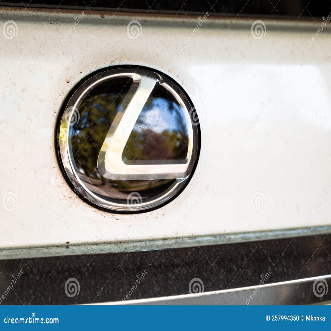

Original Dimensions :  (280, 390, 3)
1/1 [==============================] - 2s 2s/step
mazda


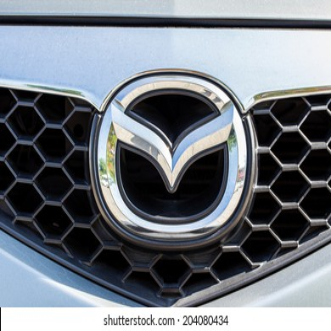

Original Dimensions :  (1704, 2272, 3)
1/1 [==============================] - 2s 2s/step
mazda


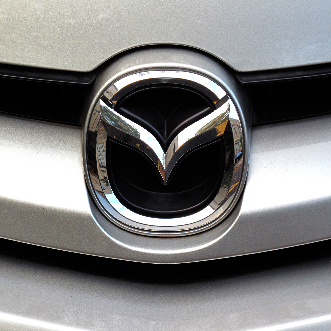

Original Dimensions :  (450, 900, 3)
1/1 [==============================] - 2s 2s/step
mercedes


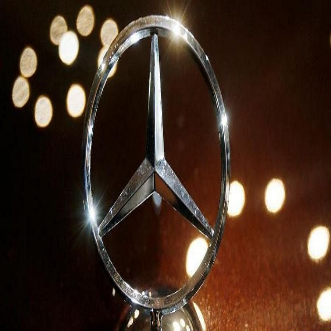

Original Dimensions :  (168, 300, 3)
1/1 [==============================] - 1s 1s/step
mercedes


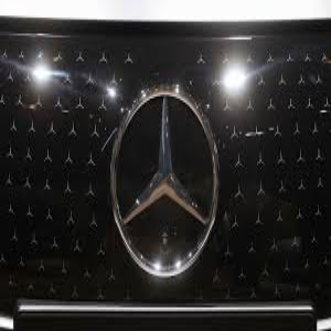

Original Dimensions :  (192, 263, 3)
1/1 [==============================] - 1s 1s/step
opel


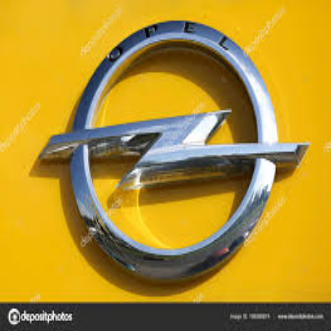

Original Dimensions :  (169, 299, 3)
1/1 [==============================] - 1s 1s/step
opel


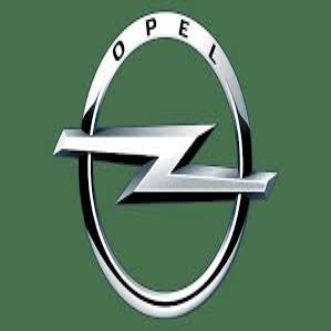

Original Dimensions :  (534, 800, 3)
1/1 [==============================] - 1s 1s/step
skoda


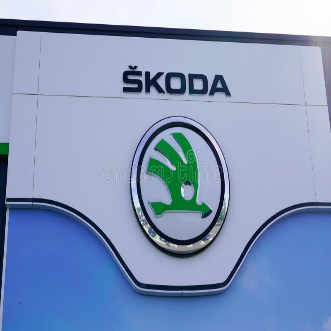

Original Dimensions :  (408, 612, 3)
1/1 [==============================] - 1s 1s/step
skoda


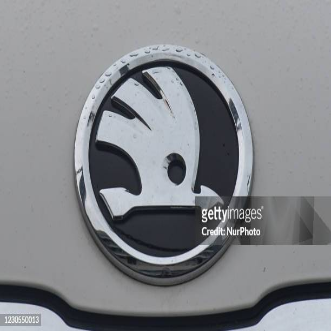

Original Dimensions :  (300, 450, 3)
1/1 [==============================] - 1s 1s/step
toyota


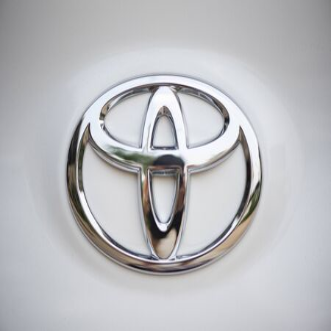

Original Dimensions :  (168, 299, 3)
1/1 [==============================] - 2s 2s/step
toyota


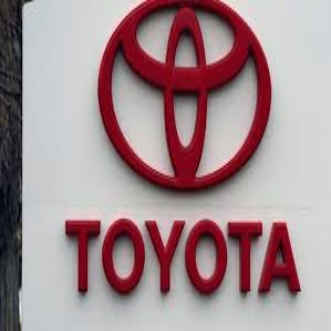

Original Dimensions :  (810, 1440, 3)
1/1 [==============================] - 2s 2s/step
volkswagen


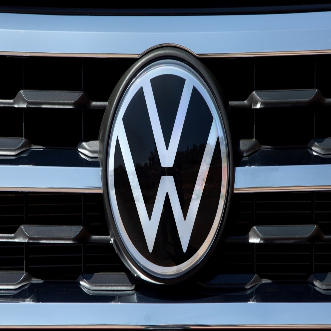

Original Dimensions :  (464, 500, 3)
1/1 [==============================] - 2s 2s/step
volkswagen


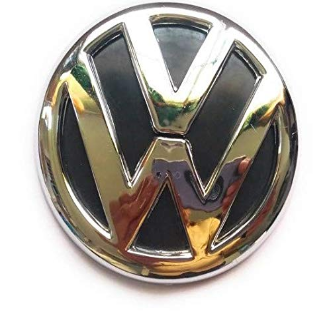

In [23]:

GetResultForImage("hyundai-1.jpg")
GetResultForImage("hyundai-2.jpg")

GetResultForImage("lexus-1.jpg")
GetResultForImage("lexus-2.jpg")

GetResultForImage("mazda-1.jpg")
GetResultForImage("mazda-2.jpg")

GetResultForImage("mercedes-1.jpg")
GetResultForImage("mercedes-2.jpg")


GetResultForImage("opel-1.jpg")
GetResultForImage("opel-2.jpg")

GetResultForImage("skoda-1.jpg")
GetResultForImage("skoda-2.jpg")

GetResultForImage("toyota-1.jpg")
GetResultForImage("toyota-2.jpg")


GetResultForImage("volkswagen-1.jpg")
GetResultForImage("volkswagen-2.jpg")